# Figures and plots for Gonzalez et al 2020

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('paper')
dat = pd.read_csv('../Data/bx_data.csv', index_col=0)
dat['multiplier'] = ['x'+str(dat.iloc[x]['mult']) for x in np.arange(len(dat))]

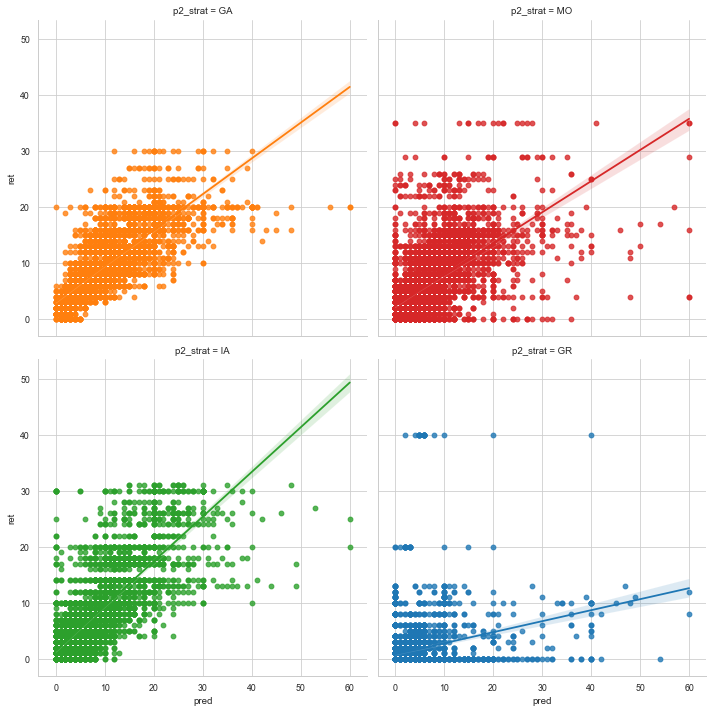

In [20]:
sns.set_style("whitegrid", {"axes.spines.left":"True"})
#sns.axes_style("black")

#sns.despine(left=False, bottom=False)
sns.lmplot(x='pred', y='ret', hue='p2_strat', hue_order=['GR', 'GA','IA','MO'],
           col='p2_strat', col_wrap=2, data=dat)

#plt.savefig('p3_preds.pdf')

AttributeError: 'PathCollection' object has no property 'legend_out'

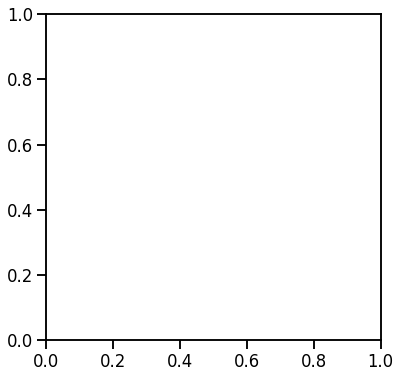

In [2]:
sns.set_context('talk')
f, ax = plt.subplots(figsize= (6,6))
sns.scatterplot(x='pred', y='ret', hue='multiplier',hue_order=['x2','x4','x6'], data=dat, palette = "Purples", ax=ax)
plt.plot(np.arange(60), np.arange(60), 'black')
plt.ylim(0,60)
plt.savefig('p3pred_xmult_all.pdf')

/Users/bryangonzalez/opt/anaconda3/envs/mTurk/lib/python3.7/site-packages/seaborn/axisgrid.py:98: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 <a list of 9 Text yticklabel objects>)

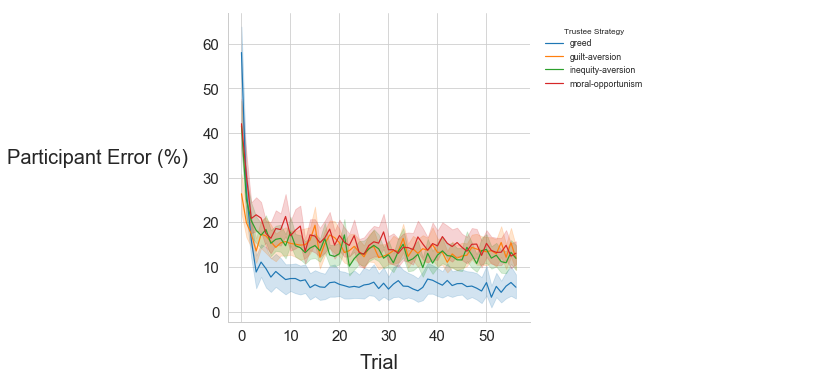

In [3]:
gg = sns.relplot(x='trial', y='turker_pe', hue='p2_strat', kind='line', hue_order=['GR','GA', 'IA', 'MO'], data=dat, legend=False)
gg.set_xlabels('Trial', labelpad=10, fontsize=20)
gg.set_ylabels('Participant Error (%)', rotation=0, fontsize=20, labelpad=105)
gg.add_legend(title='Trustee Strategy', labels=['greed','guilt-aversion', 'inequity-aversion', 'moral-opportunism'],
           title_fontsize=10, loc='upper right', bbox_to_anchor=(1.4, 1) )
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#g.axes.legend(['strategy', 'greed', 'guilt-aversion', 'inequity-aversion', 'opportunism'])
#plt.savefig('errs_x_trial.pdf')

Plotting model fits to participants

In [8]:
#fits = pd.read_csv('results/final_model_fits2turker_all.csv', index_col=0)
fits = pd.read_csv('../Results/lstsqrs_fit2_p3_100iters.csv', index_col=0)
fits.reset_index(drop=True)

,p2,p3,p2_strat,model,param1,param2,sse,aic,bic,fit_method
0,93,1,GA,rescorla-wagner,0.484419,NaN,3010.301965,228.104431,230.147482,least_squares_100iters
1,93,1,GA,inverse motive,0.226263,0.367883,752.000000,151.042048,155.128151,least_squares_100iters
2,93,1,GA,greed,NaN,NaN,8362.000000,284.338894,284.338894,least_squares_100iters
3,93,1,GA,guilt-aversion,383.512267,NaN,1115.000000,171.492830,173.535881,least_squares_100iters
4,93,1,GA,inequity-aversion,1092.871556,NaN,462.000000,121.273277,123.316328,least_squares_100iters
...,...,...,...,...,...,...,...,...,...,...
2395,32,469,MO,inverse motive,0.735076,0.448429,899.000000,161.219211,165.305313,least_squares_100iters
2396,32,469,MO,greed,NaN,NaN,5242.000000,257.720206,257.720206,least_squares_100iters
2397,32,469,MO,guilt-aversion,319.538479,NaN,2040.000000,205.926268,207.969319,least_squares_100iters
2398,32,469,MO,inequity-aversion,203.413963,NaN,928.000000,161.028887,163.071938,least_squares_100iters


In [9]:
'''
fits['p2'] = np.nan
for p2 in dat.trustee.unique():
    p2_turkers = dat.loc[dat.trustee == p2, 'turker_id'].unique()
    fits.loc[fits.p3.isin(p2_turkers), 'p2'] = p2
    '''

"\nfits['p2'] = np.nan\nfor p2 in dat.trustee.unique():\n    p2_turkers = dat.loc[dat.trustee == p2, 'turker_id'].unique()\n    fits.loc[fits.p3.isin(p2_turkers), 'p2'] = p2\n    "

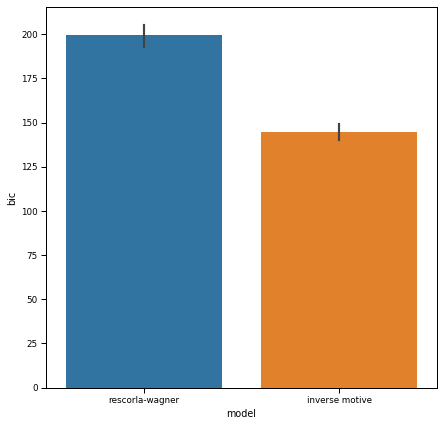

In [10]:
fig, ax1 = plt.subplots(figsize= (7,7))
sns.barplot(ax =ax1, x='model', y='bic', data=fits.loc[fits.model.isin(['inverse motive', 'rescorla-wagner'])])
plt.savefig('../Figures/learnMod_fits2_p3.pdf')

In [11]:
# parameter values
sns.boxplot(x='true DM strategy', y='param1', hue='model', data=fits.loc[fits.model.isin(['inverse RL', 'Rescorla-Wagner'])])


ValueError: Could not interpret input 'true DM strategy'

In [12]:
fits = fits.loc[fits.model != 'contextual bandit']
sns.catplot(hue = 'model',  y='BIC',kind='bar', x='true DM strategy', data = fits, aspect=2,
            hue_order=['greed', 'guilt aversion', 'inequity aversion', 'moral strategy', 'Rescorla-Wagner', 'inverse RL'])

plt.savefig('../Figures/p3_modelFits.pdf')

ValueError: Could not interpret input 'true DM strategy'

In [13]:
mod_fits = fits.loc[fits.model.isin(['Rescorla-Wagner', 'inverse RL'])]
mod_fits.head()

,p2,p3,p2_strat,model,param1,param2,sse,aic,bic,fit_method


In [18]:
compFit = pd.DataFrame({
    'p3': fits.p3.unique(),
    'p2': [fits.loc[fits.p3 == p3, 'p2'].values[0] for p3 in fits.p3.unique()],
    'p2_strat': [fits.loc[fits.p3 == p3, 'p2_strat'].values[0] for p3 in fits.p3.unique()],
    'inverse motive BIC': [fits.loc[(fits.p3 == p3)&(fits.model == 'inverse RL'), 'bic'].values[0] for p3 in fits.p3.unique()],
    'rescorla-wagner BIC': [fits.loc[(fits.p3 == p3)&(fits.model == 'Rescorla-Wagner'), 'bic'].values[0] for p3 in fits.p3.unique()]
})
compFit['fit difference'] = compFit['rescorla-wagner BIC'] - compFit['inverse motive BIC']
compFit.head()

IndexError: index 0 is out of bounds for axis 0 with size 0

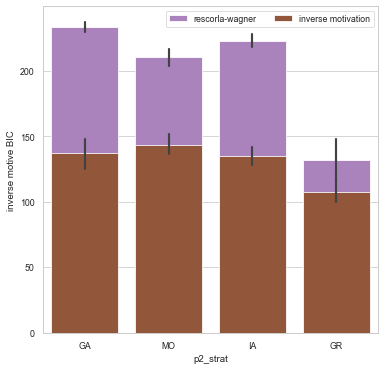

In [46]:
#sns.violinplot(x='p2_strat', y='fit difference', data=compFit)
f, ax = plt.subplots(figsize=(6,6))
sns.barplot(x='p2_strat', y='rescorla-wagner BIC', data=compFit, label="rescorla-wagner", color="#AF7AC5")
sns.barplot(x='p2_strat', y='inverse motive BIC', data=compFit, label="inverse motivation", color="#A0522D")
ax.legend(ncol=2, loc="upper right", frameon=True)
plt.savefig('../Figures/model_diffs.pdf')

In [3]:
qDat = pd.read_csv('../Data/selfReport_data_exp2.csv', index_col=0)

dat['kept'] = dat['im'] - dat['ret']
dat['p2_keep_pct'] = (dat['inv']*dat['mult'] - dat['ret'])/(dat['inv'] * dat['mult'])
dat['Return_Pct'] = dat['ret']/(dat['inv']*dat['mult'])
dat['Expectation_Pct'] = dat['exp']/(dat['inv']*dat['mult'])
dat['Prediction_Pct'] = dat['pred']/(dat['inv']*dat['mult'])
dat['P1_Payoff'] = (10 - dat['inv']) + dat['ret']
dat['P2_Payoff'] = dat['inv']*dat['mult'] - dat['ret']
dat['P2_P1_Payoff_Ratio'] = dat['P2_Payoff'] - dat['P1_Payoff']
dat['P2_P1_Payoff_Ratio_Pct'] = (dat['P2_Payoff'] - dat['P1_Payoff'])/(dat['P2_Payoff'] + dat['P1_Payoff'])
dat['P1_P2_Payoff_Ratio_Pct'] = (dat['P1_Payoff'] - dat['P2_Payoff'])/(dat['P2_Payoff'] + dat['P1_Payoff']) #altruism
dat['P2_Return_Keep'] = (dat['ret'] - dat['kept'])/(dat['inv']*dat['mult'])
dat['P2_Sacrifice'] = (dat['exp'] - dat['P2_Payoff'])/(dat['inv']*dat['mult'])

qDat['P1_P2_Payoff_Ratio_Pct'] = np.nan

for turk in qDat.turker.unique():
        qDat.loc[qDat.turker == turk, 'P1_P2_Payoff_Ratio_Pct'] = dat.loc[dat.turker == turk, 'P1_P2_Payoff_Ratio_Pct'].mean()

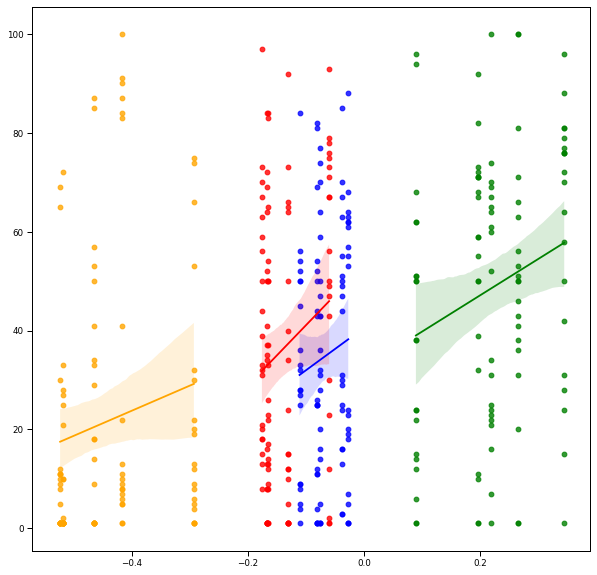

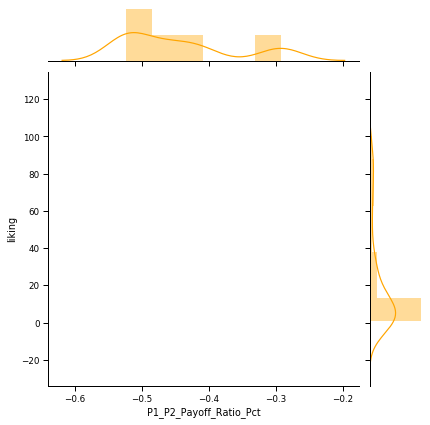

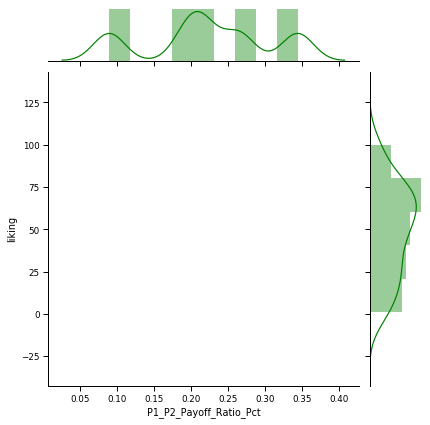

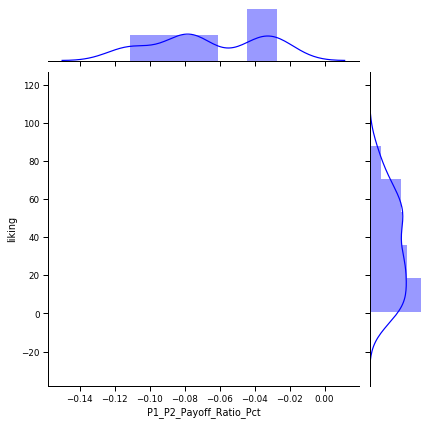

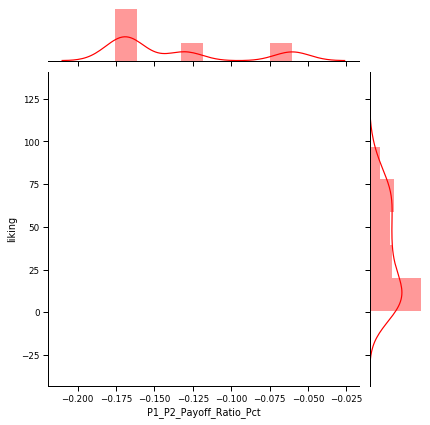

In [20]:
f, ax = plt.subplots(figsize=(10,10))
sns.jointplot(x='P1_P2_Payoff_Ratio_Pct', y='liking', kind='reg', color='Orange', data=qDat.loc[qDat.p2_strat == 'GR'], ax=ax)
sns.jointplot(x='P1_P2_Payoff_Ratio_Pct', y='liking', kind='reg', color='Green', data=qDat.loc[qDat.p2_strat == 'GA'],ax=ax)
sns.jointplot(x='P1_P2_Payoff_Ratio_Pct', y='liking', kind='reg', color='Blue', data=qDat.loc[qDat.p2_strat == 'IA'], ax=ax)
sns.jointplot(x='P1_P2_Payoff_Ratio_Pct', y='liking', kind='reg', color='Red', data=qDat.loc[qDat.p2_strat == 'MO'], ax=ax)
plt.show()

In [21]:
def multivariateGrid(col_x, col_y, col_k, df, k_is_color=False, scatter_alpha=.5):
    def colored_scatter(x, y, c=None):
        def scatter(*args, **kwargs):
            args = (x, y)
            if c is not None:
                kwargs['c'] = c
            kwargs['alpha'] = scatter_alpha
            plt.scatter(*args, **kwargs)

        return scatter

    g = sns.JointGrid(
        x=col_x,
        y=col_y,
        data=df
    )
    color = None
    legends=[]
    for name, df_group in df.groupby(col_k):
        legends.append(name)
        if k_is_color:
            color=name
        g.plot_joint(
            colored_scatter(df_group[col_x],df_group[col_y],color),
        )
        sns.distplot(
            df_group[col_x].values,
            ax=g.ax_marg_x,
            color=color,
        )
        sns.distplot(
            df_group[col_y].values,
            ax=g.ax_marg_y,
            color=color,
            vertical=True
        )
    # Do also global Hist:
    sns.distplot(
        df[col_x].values,
        ax=g.ax_marg_x,
        color='grey'
    )
    sns.distplot(
        df[col_y].values.ravel(),
        ax=g.ax_marg_y,
        color='grey',
        vertical=True
    )
    plt.legend(legends)

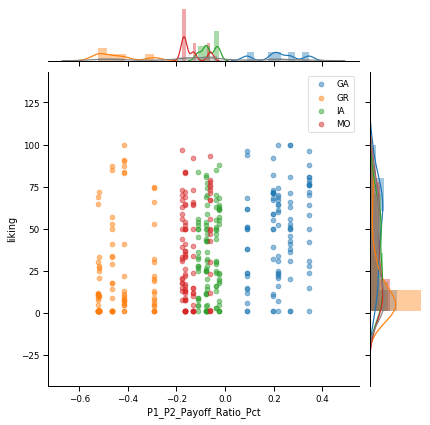

In [22]:
multivariateGrid('P1_P2_Payoff_Ratio_Pct', 'liking', 'p2_strat', df=qDat )

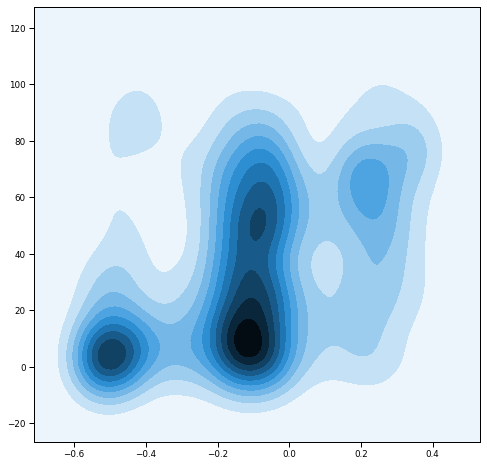

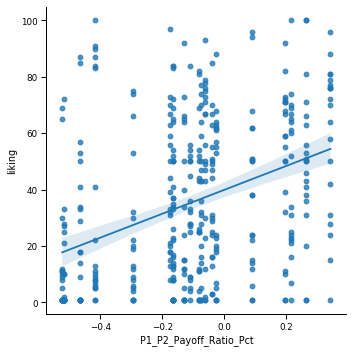

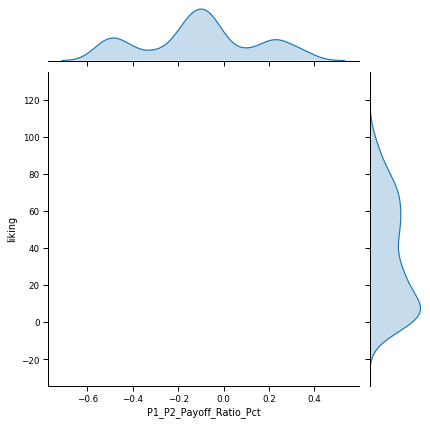

In [26]:
f, ax = plt.subplots(figsize = (8,8))
sns.lmplot(x='P1_P2_Payoff_Ratio_Pct', y='liking',data=qDat)
sns.jointplot(x='P1_P2_Payoff_Ratio_Pct', y='liking',kind='kde', data=qDat, ax=ax)
#plt.savefig('/Users/bryangonzalez/Documents/Dartmouth/Research/TheoryOfMind_Bx_experiment/Figures/altruism_liking_all.png')

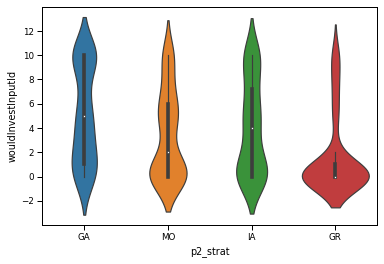

In [30]:
sns.violinplot(x='p2_strat', y='wouldInvestInputId', data=qDat)
#sns.scatterplot(x='trust',y='wouldInvestInputId', data=qDat )

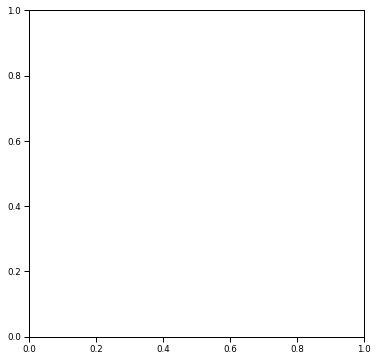

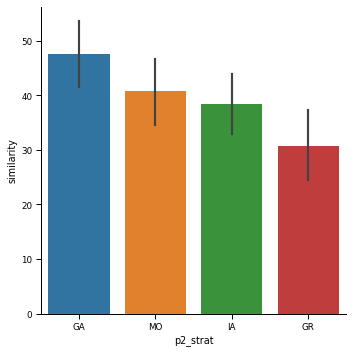

In [34]:
plt.subplots(figsize=(6,6))
sns.catplot(x='p2_strat', y='similarity', kind='bar', data=qDat)
plt.savefig('/Users/bryangonzalez/Documents/Dartmouth/Research/TheoryOfMind_Bx_experiment/Figures/similar.png')

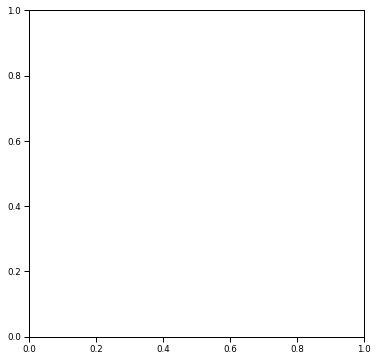

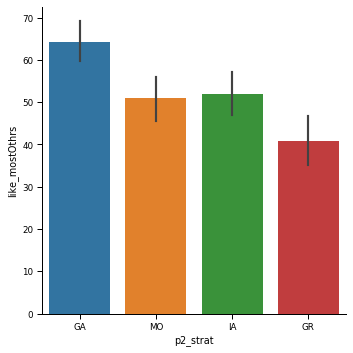

In [35]:
plt.subplots(figsize=(6,6))
sns.catplot(x='p2_strat', y='like_mostOthrs', kind='bar', data=qDat)
plt.savefig('/Users/bryangonzalez/Documents/Dartmouth/Research/TheoryOfMind_Bx_experiment/Figures/mostOthers.png')
